In [18]:
from fastai.vision import *
from fastai.metrics import error_rate

In [28]:
bs = 32

In [20]:
data_path = '../data/'
training_path = '../data/train/'
validate_path = '../data/valid/'

In [25]:
fnames = get_image_files(training_path)
fnames[:4]

[PosixPath('../data/train/rugby_11.jpg'),
 PosixPath('../data/train/cricket_2.jpg'),
 PosixPath('../data/train/rugby_20.jpg'),
 PosixPath('../data/train/rugby_15.jpg')]

In [26]:
pat = r'/([^/]+)_\d+.jpg$'

DataBunch creates its own validation set by default

In [45]:
data = ImageDataBunch.from_folder(data_path, ds_tfms=get_transforms(do_flip=False), size=224, bs=32)

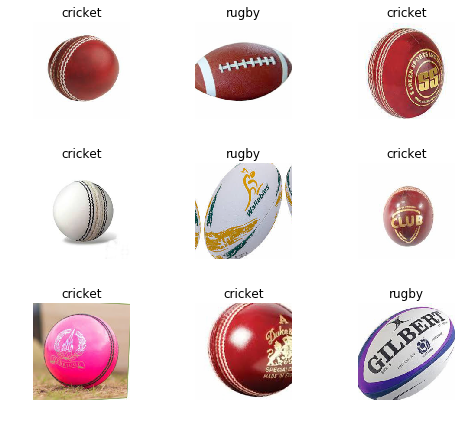

In [46]:
data.show_batch(rows=3, figsize=(7,6))

In [51]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [52]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.193879,0.560834,0.500000
2,1.025903,0.233647,0.000000
3,0.746386,0.154267,0.000000
4,0.569568,0.127990,0.000000


In [35]:
learn.save('stage-1')

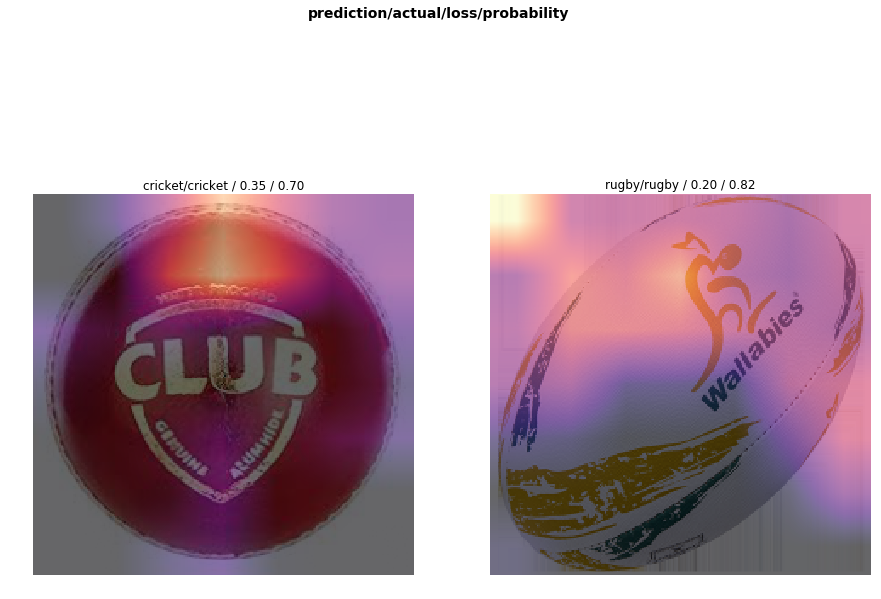

In [57]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(2, figsize=(15,11))

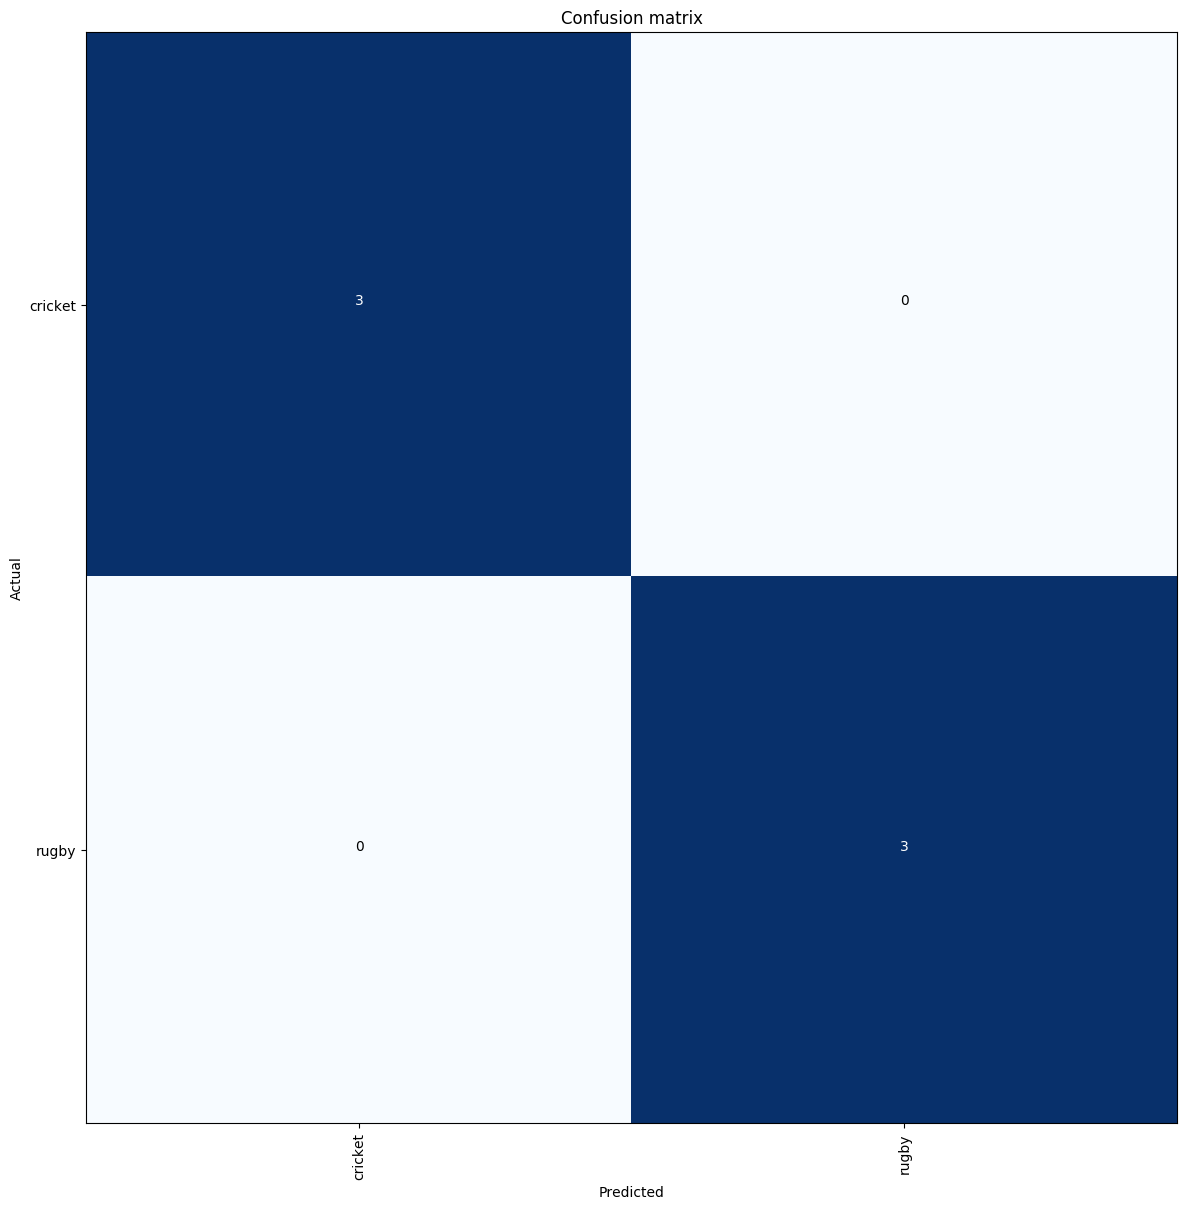

In [66]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=100)